# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
#Importa bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

#Carrega o arquivo
df = pd.read_csv('base_preparada.csv')

# Separa a variável resposta
X = df.drop('mau', axis=1)
y = df['mau']

# Dividi a base em treinamento e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

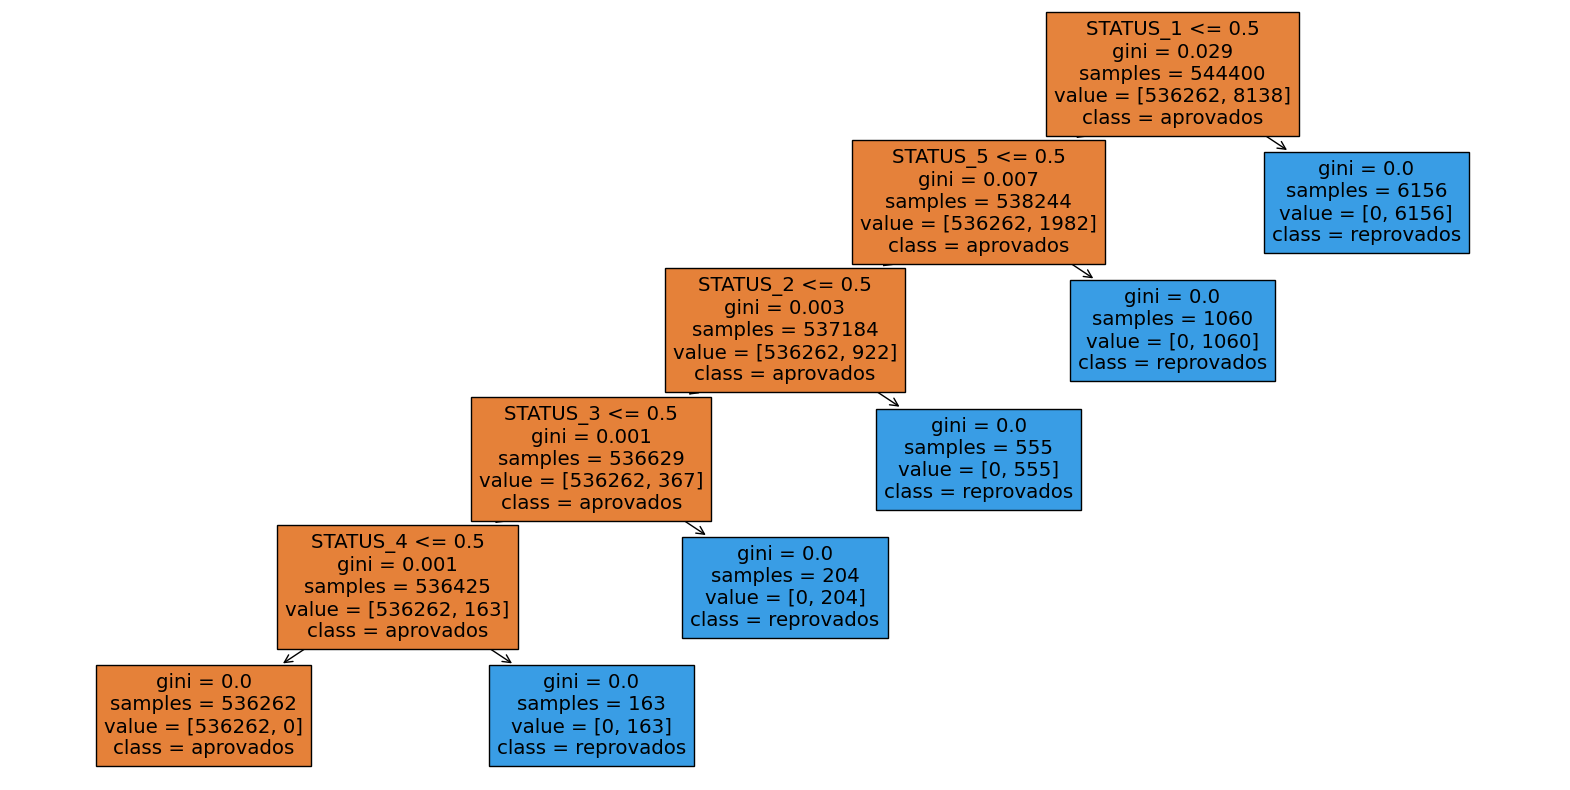

Matriz de confusão (Treinamento):
 [[536262      0]
 [     0   8138]]
Acurácia (Treinamento): 1.0


In [4]:
# 2.1) Defini o objeto da arvore de decisao
clf = DecisionTreeClassifier(random_state=42)

# 2.2) Treina o modelo
clf.fit(X_train, y_train)

# 2.3) Visualiza a arvore
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['aprovados', 'reprovados'], filled=True)
plt.show()

# 2.4) Matriz de classificacao
y_train_pred = clf.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
print("Matriz de confusão (Treinamento):\n", cm_train)

# 2.5) Calcula a acuracia na base de treinamento
acc_train = accuracy_score(y_train, y_train_pred)
print("Acurácia (Treinamento):", acc_train)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [5]:
# 3.1) Classificar a base de teste
y_test_pred = clf.predict(X_test)

# 3.2) Visualizacao da matriz de confusao para a base de teste
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
print("Matriz de confusão (Teste):\n", cm_test)

# 3.3) Calcular a acuracia da base de teste
acc_test = accuracy_score(y_test, y_test_pred)
print("Acurácia (Teste):", acc_test)

# 3.4) Treinar uma nova árvore com número minimo de observacoes por folha de 5 e maximo de profundidade de 10
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf2.fit(X_train, y_train)

y_test_pred2 = clf2.predict(X_test)
cm_test2 = confusion_matrix(y_test, y_test_pred2, labels=[0, 1])
print("Matriz de confusão (Nova Árvore):\n", cm_test2)

prop_maus = cm_test2[1].sum() / cm_test2.sum()
print("Proporção de classificados como 'maus':", prop_maus)

# 3.5) Acuracia classificando todos como 'bons'
y_all_bons = [0] * len(y_test)
acc_all_bons = accuracy_score(y_test, y_all_bons)
print("Acurácia classificando todos como 'bons':", acc_all_bons)


Matriz de confusão (Teste):
 [[229878      0]
 [     0   3437]]
Acurácia (Teste): 1.0
Matriz de confusão (Nova Árvore):
 [[229878      0]
 [     0   3437]]
Proporção de classificados como 'maus': 0.014731157448085206
Acurácia classificando todos como 'bons': 0.9852688425519148
